# How well do jobs & skills pay for Data Analytics ?

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91706\Data Analytics Practice\databases\python\Job_Data_Analysis.csv")

In [3]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US=df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg')

In [5]:
job_titles=df_US['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [6]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [7]:
job_order=df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

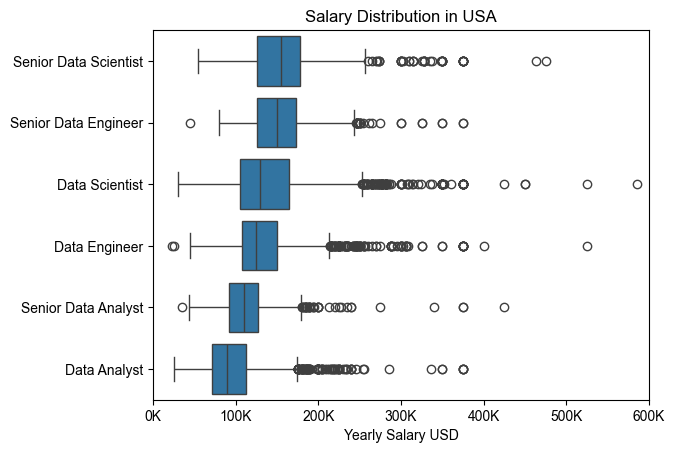

In [8]:
sns.boxplot(data=df_US_top6,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in USA')
plt.xlabel('Yearly Salary USD')
plt.ylabel('')
plt.xlim(0,600000)
ticks_x=plt.FuncFormatter(lambda y,_: f'{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salry VS Skill for Data Analyst

In [11]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US=df_DA_US.dropna(subset='salary_year_avg')

In [12]:
df_DA_US=df_DA_US.explode('job_skills')
df_DA_US.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."


In [17]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_DA_top_pay=df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [22]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median',ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


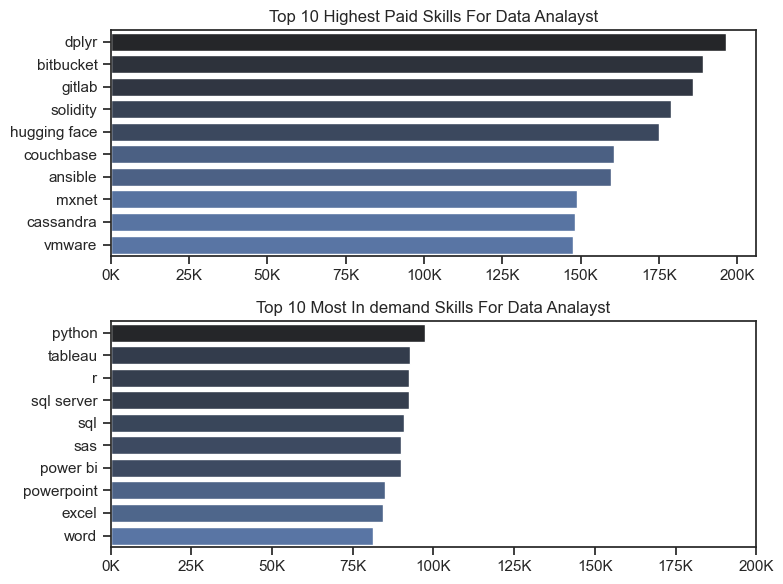

In [46]:
fig,ax= plt.subplots(2,1,figsize=(8,6))

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills For Data Analayst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_ : f'{int(x/1000)}K'))

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index,hue='median',ax=ax[1],palette='dark:b_r')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most In demand Skills For Data Analayst')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_ : f'{int(x/1000)}K'))

plt.xlim(0,200000)

plt.tight_layout()
plt.show()